In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from numba import njit
from tqdm.notebook import tqdm

In [139]:
plt.rcParams["figure.figsize"] = (15,5)

D = 0.3
L= 670e-9
A = 0.001
a = 0.0001
d = 0.0009

N = 100000
x = np.random.uniform(-A/2,A/2,N)
y1 = np.random.uniform(d/2-a/2,(a/2)+d/2,N)
y = y1*np.random.choice([-1,1],N)
z = np.linspace(-0.004,0.004,500)

def I(x,y,z):
    I11 = []
    f1 = np.exp(2*np.pi*1j*(2*D)/L)*np.exp((np.pi*1j*(x - y)**2)/(L*D))*np.exp((np.pi*1j*(z - y)**2)/(L*D))
    I1 = f1.mean()
    I11.append((np.abs(I1))**2)

    return I11

Ints = []

for z_i in z:
    Ints.append(I(x, y, z_i))


In [140]:
def clasico(z,y):
    theta = np.arctan(z/D)
    I_c = (np.cos((np.pi*d/L)*(np.sin(theta))))**2*(np.sinc(a*np.sin(theta)/L))**2
    return I_c
clasic_ints = []

for z_i in z:
    clasic_ints.append(clasico(z_i,y))


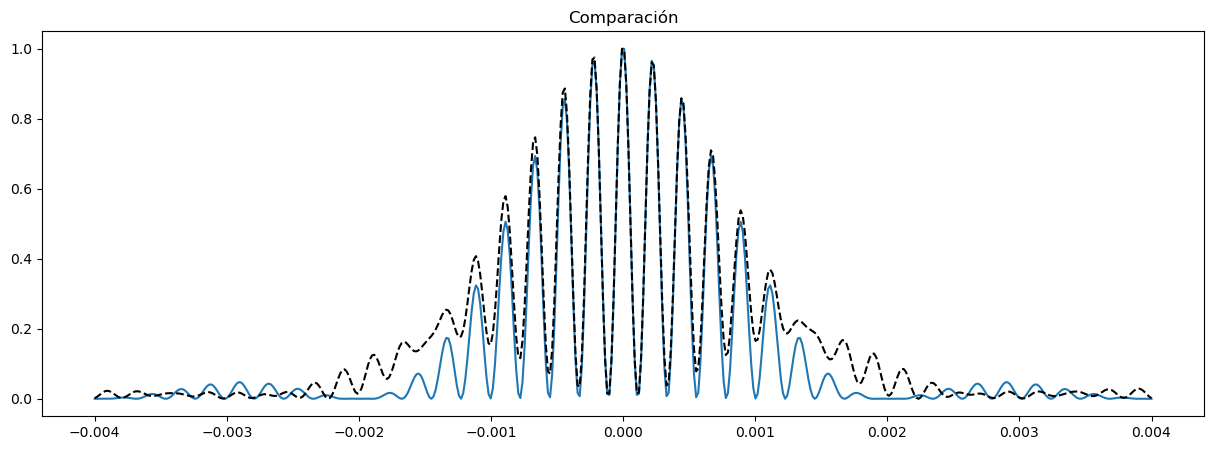

In [141]:
plt.plot(z,np.array(clasic_ints)/max(clasic_ints))
plt.plot(z,np.array(Ints)/max(Ints),c='k',ls="--")
plt.title("Comparación")
plt.show()

Los modelos clásico y de integración de caminos se asemejan bastante, aunque difieren para valores bajos de la intensidad. Esto puede ser causado por la aproximación de ángulos pequeños que se suele usar para el modelo clásico además de la consideración de la curvatura de las ondas que no se tiene en cuenta en este modelo.

# Punto 2

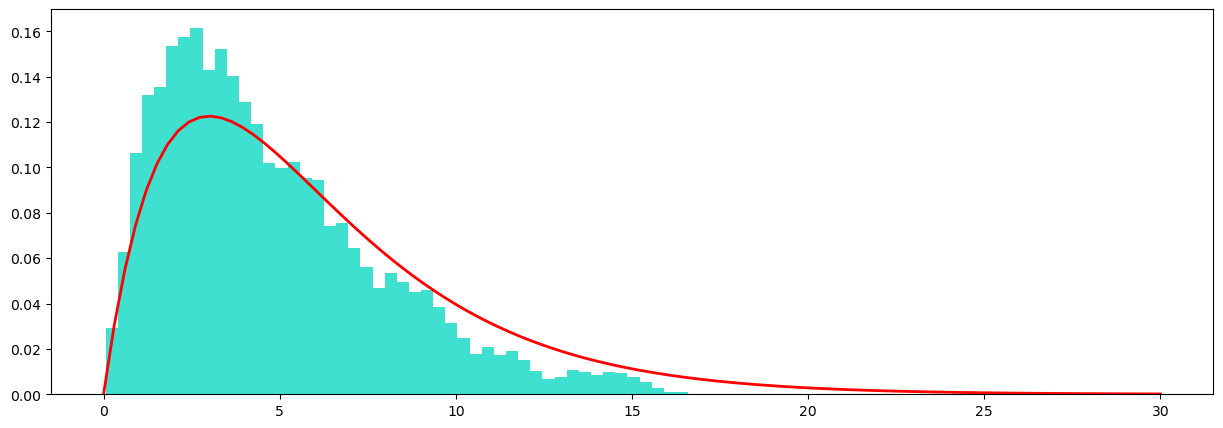

In [144]:
import scipy
from scipy.stats import gamma

alpha = 2
beta = 3
def func(x):
    return x**(alpha-1)*np.exp(-x/beta)

N = 10000
x_s = []
x_a = np.random.uniform()

for n in range(N):
    d_x = np.random.uniform(-1,1)
    xp = abs(x_a +d_x)
    f_x = func(x_a)
    fxp = func(xp)

    U = np.random.uniform(0,1)

    if U < ((fxp)/f_x):
        x_a = xp
    x_s.append(x_a)

x = np.linspace (0, 30, 100)
fig, ax = plt.subplots()
ax.hist(x_s, bins=50, density=True, alpha=1, color='turquoise')


x_teorico = np.linspace(0, 30, 100)
ax.plot(x_teorico, gamma.pdf(x_teorico, alpha, scale=beta), 'r-', lw=2)

plt.show()




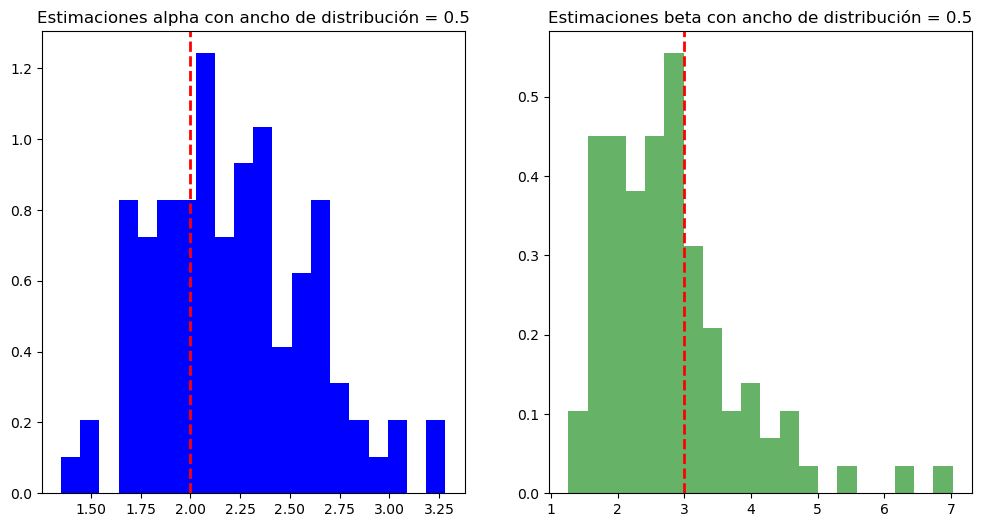

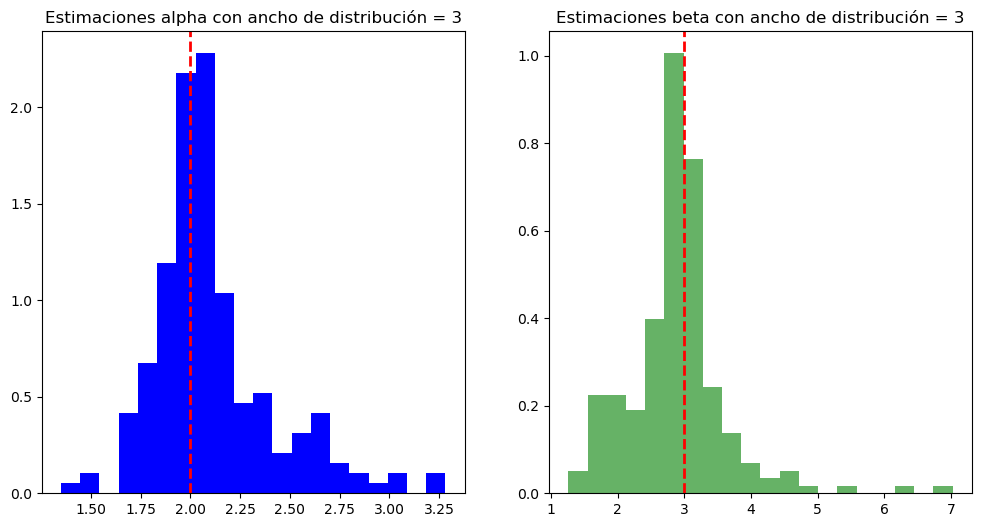

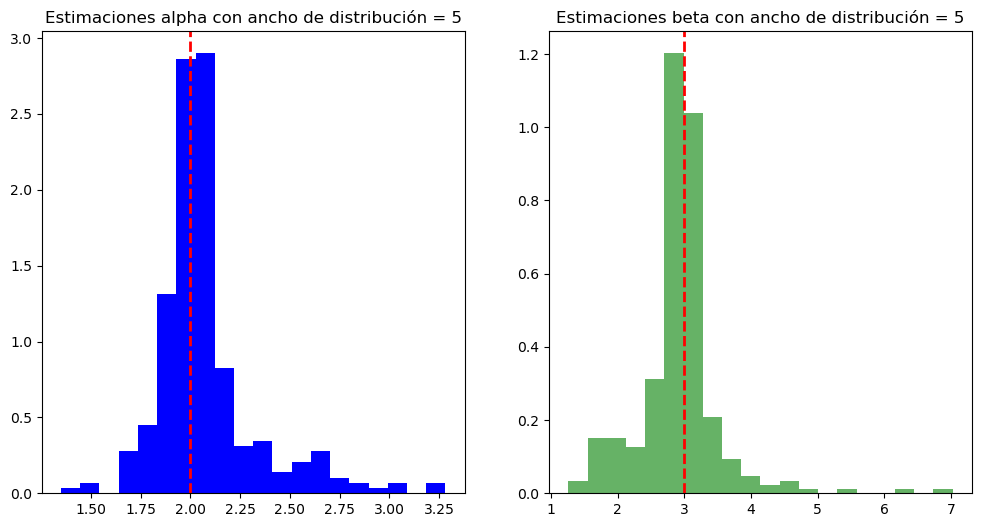

In [145]:
N = 10000
alpha = 2
beta = 3

def metropolis(N, step):
    s_x = []
    x_a = np.random.uniform(0,1)

    for n in range(N):
        d_x= np.random.uniform(-step, step)
        xp = abs(x_a + d_x)
        f_x = func(x_a)
        fxp = func(xp)
        U = np.random.uniform(0,1)
        if U < ((fxp)/f_x):
            x_a = xp
        s_x.append(x_a)

    return s_x

def fit(m):
    shape, loc, scale = gamma.fit(m, floc = 0)
    return shape, scale

n_expe = 100

e_alphas = []
e_bethas = []

max_ancho_1 = 0.5
max_ancho_2 = 3
max_ancho_3= 5

#max_ancho 1
for i in range(n_expe):
    muestras = metropolis(N, max_ancho_1)
    alpha_e, betha_e = fit(muestras)
    e_alphas.append(alpha_e)
    e_bethas.append(betha_e)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(e_alphas, bins=20, density=True, alpha=1 , color='b')
ax1.axvline(alpha, color='r', linestyle='dashed', linewidth=2, label= f'alpha refernecia ({alpha})')
ax1.set_title('Estimaciones alpha con ancho de distribución = 0.5')

ax2.hist(e_bethas, bins=20, density=True, alpha=0.6, color='g')
ax2.axvline(beta, color='r', linestyle='dashed', linewidth=2,label=f'alpha refernecia ({beta})')
ax2.set_title('Estimaciones beta con ancho de distribución = 0.5')

plt.show()

#max_ancho 2
for i in range(n_expe):
    muestras = metropolis(N, max_ancho_2)
    alpha_e, betha_e = fit(muestras)
    e_alphas.append(alpha_e)
    e_bethas.append(betha_e)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
ax3.hist(e_alphas, bins=20, density=True, alpha=1 , color='b')
ax3.axvline(alpha, color='r', linestyle='dashed', linewidth=2,label=f'alpha refernecia ({alpha})')
ax3.set_title('Estimaciones alpha con ancho de distribución = 3')

ax4.hist(e_bethas, bins=20, density=True, alpha=0.6, color='g')
ax4.axvline(beta, color='r', linestyle='dashed', linewidth=2, label=f'beta refernecia ({beta})')
ax4.set_title('Estimaciones beta con ancho de distribución = 3')

#max_ancho 3
for i in range(n_expe):
    muestras = metropolis(N, max_ancho_3)
    alpha_e, betha_e = fit(muestras)
    e_alphas.append(alpha_e)
    e_bethas.append(betha_e)

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 6))
ax5.hist(e_alphas, bins=20, density=True, alpha=1 , color='b')
ax5.axvline(alpha, color='r', linestyle='dashed', linewidth=2, label=f'alpha referencia ({alpha})')
ax5.set_title('Estimaciones alpha con ancho de distribución = 5')

ax6.hist(e_bethas, bins=20, density=True, alpha=0.6, color='g')
ax6.axvline(beta, color='r', linestyle='dashed', linewidth=2, label=f'alpha referencia ({alpha})')
ax6.set_title('Estimaciones beta con ancho de distribución = 5')

plt.show()

Si se cambia el ancho de distribución de perturbación del Metrópolis, si cambian los histogramas. A medida que se aumenta el rango de perturbación, las estimaciones son más cercanas a alpha y beta. Estos cambios en los histogramas son generados porque, al aumentar los pasos las perturbaciones seran más grndes, lo que hara que los valores obtenidos se alejen de los bete y alpha definidos al principio, Beta = 3 y alpha= 2. 

Si se aumenta N los histogramas varian

# Punto 3

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def E(U,i,j,J,N):
    return -J*np.sum(U[i,j]*U[np.mod(i+1,N),j] + U[i,j]*U[i,np.mod(j+1,N)] + U[i,j]*U[np.mod(i-1,N),j] + U[i,np.mod(j-1,N)])

N = 50
U = np.random.choice([-1, 1], size=(N, N))

def dE(N,J,B,U):
    i = np.random.choice(list(range(N)))%N
    j = np.random.choice(range(N))%N
    E_old = E(U, i,j,J,N) + E(U,np.mod(i+1,N),j,J,N) + E(U,np.mod(i-1,N),j,J,N) + E(U,i,np.mod(j+1,N),J,N) + E(U,i,np.mod(j-1,N),J,N) 
    U[i,j] = -U[i,j]
    E_new = E(U, i,j,J,N) + E(U,np.mod(i+1,N),j,J,N) + E(U,np.mod(i-1,N),j,J,N) + E(U,i,np.mod(j+1,N),J,N) + E(U,i,np.mod(j-1,N),J,N)
    Energia = E_new - E_old
    return [Energia, U]

B = 10
J = 0.2

def act_U(N,J,B,U):
    DE = dE(N,J,B,U) 
    if DE[0]<= 0:
        DE = dE(N,J,B,U)
        U = DE[1]
    elif DE[0] > 0:
        u = np.random.uniform(0,1)
        if u <= np.exp(-B*DE[0]):
            U = DE[1]
    return U

frames = 500
it = 400

def update(frame, img, grid, J, B, it,N):
    for _ in range(it):
        U = act_U(N,J,B,U)
        img.set_array(U)
    return img,

def animate_ising(N, J, B, it):
    grid = initialize_grid(N)
    
    fig, ax = plt.subplots()
    img = ax.imshow(U, interpolation='nearest', cmap='coolwarm', animated=True)
    
    ani = animation.FuncAnimation(
        fig, update, fargs=(img, U, J, B, it,N), 
        frames=frames,interval=50, blit=True)
    
    ani.save("ising_model.gif", writer="pillow")
    animate_ising(N, J, B, it)

In [ ]:

from IPython.display import Image
Image(filename="ising_model.gif")

# Punto 4

In [21]:
import pandas as pd
import re
df = pd.read_csv("https://www.gutenberg.org/cache/epub/1661/pg1661.txt", delimiter="\t")
df = df.replace("\r\n","\n").replace("\n\n","#").replace("#","\n\n").replace("'", "").replace('"', "").replace("_", "")
df = df.replace(r'\s+', ' ')
df = df.applymap(lambda x: x.lower())

C:\Users\myria\AppData\Local\Temp\ipykernel_17608\625135969.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower())


In [23]:
from itertools import combinations
df = pd.read_csv("https://www.gutenberg.org/cache/epub/1661/pg1661.txt", delimiter="\t")
df = df.replace("\r\n","\n").replace("\n\n","#").replace("#","\n\n").replace("'", "").replace('"', "").replace("_", "")
df = df.replace(r'\s+', ' ')
df = df.applymap(lambda x: x.lower())

atoms = df
abc = list('abcdefghijklmnoprstuvwxyz')
punt = list(".,!?")
s_chars = [' ', '\n']
chars = abc + punt + s_chars


C:\Users\myria\AppData\Local\Temp\ipykernel_17608\3150540071.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower())


In [22]:
def ngramas(atoms,n):
    ngrama = []
    for i in range(len(atoms)-n-1):
        grm = atoms[i:i+n]
        ngrama.append(grm)
    return ngrama

def Matriz_F(ngram, df,n):
    df = list(df)
    F = pd.DataFrame(np.zeros((len(chars), len(ngram)),dtype=int), index=chars, columns=ngram)
    for i in range(int(len(ngram))-1):
        F.loc[df[i],df[i+1]] +=1
    return F

def text(F,ng):  
    P = F/F.sum(axis=1).values[:,None]
    ngrama_i = np.random.choice(ng)
    m = 1500
    for caract in range(m):
        nueva_letra = np.random.choice(P.index, p=P.loc[:, ngrama_i])
        ngrama_i = ngrama_i[1:] + nueva_letra
        
    return ngrama_i

ng = ngramas(atoms,3)
F = Matriz_F(ng,df,3)
texto = text(F,ng)
print(F)

ValueError: Shape of passed values is (31, 9616), indices imply (31, 1)

# Punto 5

# 5.1

In [158]:
from scipy.integrate import solve_ivp

A = 1000
B = 20
t_U = 23.4 * 24 / 60  
t_Np = 2.36           
L_u = 1/t_U           
L_np = 1/t_Np       
U = 0
Np = 0
Pu = 0
ds = 30  
it = 1000  

U_evol = []
Np_evol = []
Pu_evol = []

def E(U, Np, Pu):
    return A * np.log(1 + U) - L_u * U - L_np * Np - B * Pu

for d in range(ds):
    for _ in range(it):
        act = np.array([U, Np, Pu])
        E_act = E(U, Np, Pu)
        estado = act + np.random.normal(0, 1, 3)
        estado = np.maximum(estado, 0) 
        U_new, Np_new, Pu_new = estado
        prop_E = E(U_new, Np_new, Pu_new)

        if np.random.rand() < np.exp(prop_E - E_act):
            U, Np, Pu = U_new, Np_new, Pu_new

    U_evol.append(U)
    Np_evol.append(Np)
    Pu_evol.append(Pu)
    

#5.1 a

In [ ]:
def sist_ed(t, y):
    U, Np, Pu = y
    dU_dt = -L_u * U  
    dNp_dt = L_u * U - L_np * Np  
    dPu_dt = L_np * Np 

    return [dU_dt, dNp_dt, dPu_dt]

cond_ini = [U_evol[0], Np_evol[0], Pu_evol[0]]
sol = solve_ivp(sist_ed, [0, 100],cond_ini, method='RK45', dense_output=True)
U_estable, Np_estable, Pu_estable = sol.y[:, -1]
epsilon = 1e-4 
t_estable = None  
for i, t in enumerate(sol.t):
    dU_dt, dNp_dt, dPu_dt = sist_ed(t, sol.y[:, i])
    if abs(dU_dt) < epsilon and abs(dNp_dt) < epsilon and abs(dPu_dt) < epsilon:
        t_estable = t
        break


if t_estable is not None:
    print(f"Estado estable\nU-239: {U_estable:.4f}, Np-239: {Np_estable:.4f}, Pu-239: {Pu_estable:.4f}")
    print(f"Tiempo estado estable: {t_estable:.2f} días")

#evols = np.array([U_evol, Np_evol, Pu_evol]).T
evols = np.array([Pu_evol]).T

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(evols, cmap='viridis', interpolation='nearest', aspect='auto')
ax.set_title('Evolución de Isótopos')
ax.set_ylabel('Días')
#ax.set_xticks([0, 1, 2]) 
#ax.set_xticklabels(['Pu-239']) 
fig.colorbar(im, ax=ax, orientation='vertical')

def update(frame):
    evol_frame = evols[:frame + 1, :]
    im.set_array(evol_frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=ds, interval=200, blit=True)
ani.save('evolucion_isotopos.gif', writer='imagemagick')
plt.show()

CORRECCIÓN 5

# 5.2 - a

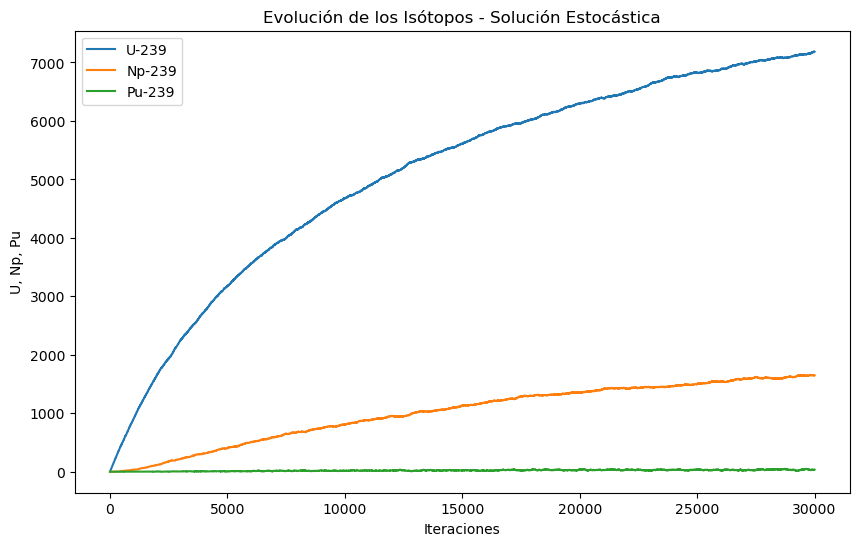

In [162]:
A = 1000
B = 20
t_U = 23.4*24/60
t_Np = 2.36        
L_u = 1/t_U       
L_np = 1/t_Np        
U = 0
Np = 0
Pu = 0
ds = 30 
it = 1000 

Y = [U, Np, Pu]
R = np.array([[1, 0, 0], 
              [-1, 1, 0], 
              [0, -1, 1], 
              [0, 0, -1]])
t = 0
r_evol = []

for d in range(ds):
    for _ in range(it):
        T = np.array([A, L_u*Y[0],L_np*Y[1], B*Y[2]])

        tau_new = np.random.exponential(1 / T.sum())
        r = np.random.choice(range(len(R)), p=T / T.sum())    
        Y_new = Y + R[r]
        t_new = t + tau_new
        r_evol.append(Y_new)
        t = t_new
        Y = Y_new

r_evol = np.array(r_evol)

plt.figure(figsize=(10, 6))
plt.plot(r_evol)
plt.xlabel("Iteraciones")
plt.ylabel("U, Np, Pu")
plt.title("Evolución de los Isótopos - Solución Estocástica")
plt.legend(['U-239', 'Np-239', 'Pu-239'])
plt.show()

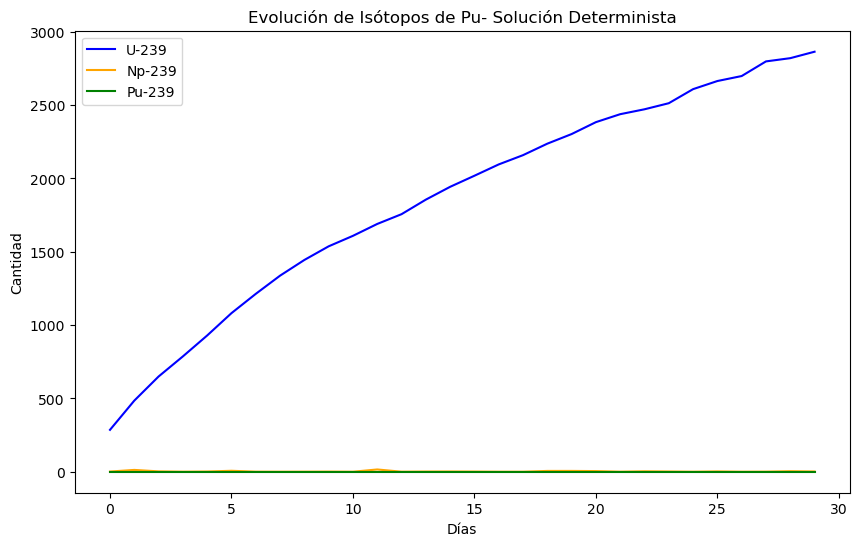

In [135]:
U_evol = []
Np_evol = []
Pu_evol = []

def E(U, Np, Pu):
    return A*np.log(1 + U) - L_u*U - L_np*Np - B*Pu

for d in range(ds):
    for _ in range(it):
        act = np.array([U, Np, Pu])
        E_act = E(U, Np, Pu)
      
        estado = act + np.random.normal(0, 1, 3)
        estado = np.maximum(estado, 0)
        U_new, Np_new, Pu_new = estado
        prop_E = E(U_new, Np_new, Pu_new)
        if np.random.rand() < np.exp(prop_E - E_act):
            U, Np, Pu = U_new, Np_new, Pu_new

    U_evol.append(U)
    Np_evol.append(Np)
    Pu_evol.append(Pu)

dias = np.arange(ds)

plt.figure(figsize=(10, 6))
plt.plot(dias, U_evol, label="U-239", color='blue')
plt.plot(dias, Np_evol, label="Np-239", color='orange')
plt.plot(dias, Pu_evol, label="Pu-239", color='green')
plt.xlabel("Días")
plt.ylabel("Cantidad")
plt.title("Evolución de Isótopos de Pu- Solución Determinista")
plt.legend()
plt.show()

# 5.2 - b

In [ ]:
num_sim = 600
count_80 = 0

for sim in range(num_sim):
    U = 0
    Np = 0
    Pu = 0
    Y = np.array([U, Np, Pu])  
    R = np.array([[1, 0, 0],  
                  [-1, 1, 0],  
                  [0, -1, 1],  
                  [0, 0, -1]])  

    t = 0  
    for d in range(ds):
        for _ in range(it):
            T = np.array([A, L_u*Y[0], L_np*Y[1], B*Y[2]])

            tau_new = np.random.exponential(1/T.sum())
            r_index = np.random.choice(range(len(R)), p=T/T.sum())
            Y_new = Y + R[r_index]
            Y_new = np.maximum(Y_new, 0)
            t += tau_new
            Y = Y_new
        if Y[2] >= 80: 
            count_80 += 1
            break
        

p80 = count_80/num_sim

print(f"Probabilidad de que el nivel de Pu sea igual o mayor que 80: {p80:.2f}")